<a href="https://colab.research.google.com/github/zetta-health/exp-curso-python-saude/blob/master/PySaude_03_python_arvore_regressao_projeto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 <a href="https://www.linkedin.com/company/zetta-health-analytics/" align="center"><img src="https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/assets/zetta-exp-logo.jpg" width="400" align="center"></a>

# **Árvores de decisão**
---

Neste notebook, faremos um modelo de [árvore de decisão](https://en.wikipedia.org/wiki/Decision_tree_learning) utilizando o módulo [scikit-learn](https://scikit-learn.org/stable/modules/tree.html).

Modelos de árvore de decisão são frequentemente utilizados na área da saúde, sendo úteis para quando as decisões tomadas tem que ser facilmente interpretadas e justificadas.

## Índice

* [Importando módulos](#imports)
* [1. Carregando os dados](#data)
* [2. Análise exploratória](#analysis)
* [3. Árvore de regressão](#tree)

## **Importando módulos** <a name="imports"></a>

A primeira coisa a ser feita é importar os módulos para termos as funcionalidades de trabalhar com os dados e construir os modelos.

Caso haja algum erro você pode consultar nosso [notebook sobre bibliotecas](https://github.com/zetta-health/exp-curso-python-saude/blob/master/PySaude_01_colab_visao_geral_03_bibliotecas.ipynb).

In [ ]:
 #!pip install -q dtreeviz

In [ ]:
# Trabalhar com os dados
import pandas as pd
import numpy as np
# Criação e avaliação do modelo
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
# Visualização
import matplotlib.pyplot as plt
import seaborn as sns
from dtreeviz.trees import *

---

## **1. Carregando os dados** <a name="data"></a>

Agora vamos carregar nosso dataset! Esse banco de dados relaciona gastos de um plano de saúde com seus beneficiários com alguns atributos que podem impactar nesses gastos, como idade e sexo. 

Podemos utilizá-lo para criar um modelo que preverá os custos de um beneficiário que não esteja nesta base.

In [ ]:
URL = 'https://raw.githubusercontent.com/zetta-health/exp-curso-python-saude/master/data/insurance.csv'

# EXERCICIO 01 [8 pontos]. Complete seu código abaixo para ler os dados da URL. Use a função 'pd.read_csv'.
df = 

# EXERCICIO 02 [8 pontos]. Imprima os cinco primeiros casos.


In [ ]:
# EXERCICIO 03 [8 pontos]. Quantos atributos (colunas) e quantas linhas existem no banco de dados?


---

## **2. Análise exploratória** <a name='analysis'></a>

Como vimos no nosso notebook de [análise exploratória](https://github.com/zetta-health/exp-curso-python-saude/blob/master/PySaude_03_python_analise_exploratoria_de_dados.ipynb), é bastante comum haver erros no preenchimento de alguns campos, como atributos com valores escritos de formas diferentes, ou atributos com valores ausentes.  


Além disso, é possível que os valores venham com os tipos de dados que precisam ser convertidos, por exemplo, às vezes números podem vir como _objects_ (_strings_).


Precisamos tratar desses problemas antes de realizar qualquer análise e construir algum modelo.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


Vamos verificar os valores das colunas `sex`, `smoker` e `region`, que foram carregadas como `object`, ou seja, são categóricas. Isso significa que os valores podem ser letras, números, ou uma mistura dos dois.

Para começar, vamos visualizar a frequência dessas variáveis.

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
northwest    325
southwest    325
northeast    324
Name: region, dtype: int64

Será preciso converter as variáveis `categóricas` em `numéricas`,  para podermos utilizá-las nos modelos.

In [ ]:
# Para convertê-las, podemos usar a função 'map'.
df['sex_r'] = df['sex'].map({'female': 0, 'male': 1}) 
df['smoker_r'] = df['smoker'].map({'no': 0, 'yes': 1})

X = df.drop(['region', 'smoker', 'sex'], axis=1) # Salvamos o resultado em outra 
                                                 # variável que será utilizada
                                                 # futuramente.

In [ ]:
# Visualizar se as variáveis foram convertidas
X.head()

,age,bmi,children,charges,sex_r,smoker_r
0,19,27.900,0,16884.92400,0,1
1,18,33.770,1,1725.55230,1,0
2,28,33.000,3,4449.46200,1,0
3,33,22.705,0,21984.47061,1,0
4,32,28.880,0,3866.85520,1,0


Podemos facilitar a visualização dos dados usando gráficos.

### Idade dos participantes - histograma

In [ ]:
# EXERCICIO 04 [8 pontos]. Faça um histograma com o atributo 'age' (idade).


### Distribuição por sexo - gráfico de barras

In [ ]:
# EXERCICIO 05 [8 pontos]. Faça um gráfico de barras com o atributo 'sex' (sexo).


### Índice de massa corporal por sexo - boxplot

In [ ]:
# EXERCICIO 06 [8 pontos]. Faça um boxplot (caixas e bigodes) comparando o índice de massa 
# corporal por sexo.
# Este link pode ser útil: https://seaborn.pydata.org/generated/seaborn.boxplot.html


### Sinistro - histograma, medida de tendência central e dispersão

In [ ]:
df['charges'].describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [ ]:
# EXERCICIO 07 [8 pontos]. Faça um histograma com o atributo 'charges' (sinistro).


### Frequência de fumantes - barras

In [ ]:
# EXERCICIO 08 [8 pontos]. Faça um gráfico de barras com o atributo 'smoker' (fumante).


### Matriz de Correlação

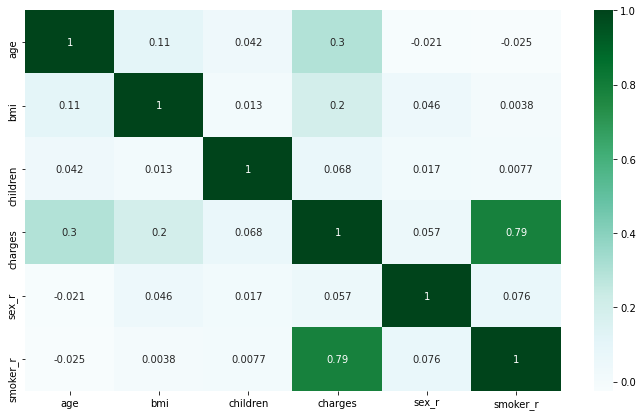

In [ ]:
# Vamos visualizar o quão correlacionadas as variáveis estão umas com as outras.
plt.figure(figsize=(12,7))
sns.heatmap(X.corr(), 
            cmap='BuGn', 
            annot=True)

## **3. Árvore de regressão** 

É hora de construir o modelo!





### a) Selecione os atributos (colunas) com correlação superior a 0,15 para incluir no modelo.

In [ ]:
## EXERCICIO 09 [8 pontos]. Selecione os atributos editando a lista abaixo:
lista_de_variaveis = [None]

# Não edite código abaixo
X = X[lista_de_variaveis]

y = df['charges']

### b) Train/Test split 

É comum dividirmos o banco de dados em um **banco de treino** e um **banco de teste**. Como os nomes sugerem, o banco de treino é usado para treinar o modelo e o banco de teste é usado para testarmos a habilidade preditiva do modelo.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

### c) Selecionar algoritmo e parâmetros, treinar modelo

In [ ]:
# Primeiro, criamos o modelo.
regr = DecisionTreeRegressor(max_depth=3,
                            min_samples_leaf=20,
                            random_state=0)

In [ ]:
# Depois, é preciso treiná-lo.
regr.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=20, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [ ]:
# Predição do modelo
yhat = regr.predict(X_test)

### d) Avaliar métricas do modelo

Nesse momento, comparamos as predições do nosso modelo com os casos reais do banco de teste. Isso nos permite avaliar o quão acuradas nossas predições são.

In [ ]:
## EXERCICIO 10. [8 pontos] Estime o coeficiente de determinação (R quadrado) e 
##                a raiz quadrada do erro médio (RMSE)
## Estes links podem ser úteis: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier.score 
##                              https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html


[Validação cruzada](https://scikit-learn.org/stable/modules/cross_validation.html) (*cross-validation*) é um método muito usado para evitar o [sobreajuste](https://pt.wikipedia.org/wiki/Sobreajuste) (*overfitting*) do modelo. 

In [ ]:
# Essa célula serve apenas para visualizar o R² do modelo com cross-validation
print(cross_val_score(regr, X, y, cv=5))
cross_val_score(regr, X, y, cv=5).mean() # média

### e) Visualizar modelo de regressão

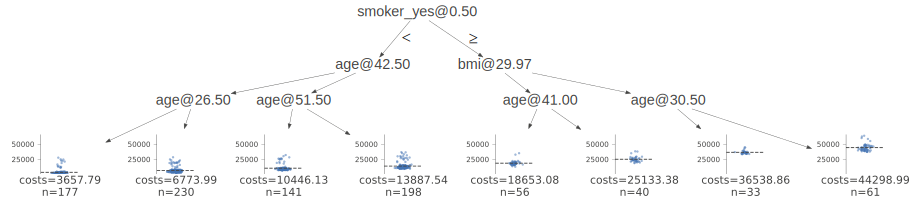

In [ ]:
# Por fim, vamos gerar a árvore
viz = dtreeviz(regr,
               X_train,
               y_train,
               target_name='costs',
               feature_names=X.columns.values,
               fancy=False,
               scale=1.2)

viz

## **Exercício 11 [20 pts] -  Interprete os resultados da árvore de decisão acima (use o próprio mardown).**


# **ENVIO - Como submeter seu projeto**

Envie seu notebook para um dos monitores do curso, via **Slack**. Retornaremos com o feedback tão logo terminemos de corrigir. Geralmente, demoramos 7 dias.

# **Yey! Parabéns por ter completado este notebook!**


Este notebook faz parte do curso de *Introdução ao Python para Gestão da Saúde*, ministrado por [Caio Salgado](https://www.linkedin.com/in/caio-salgado-b5758312/) e oferecido pela [Zetta Exponential](https://www.linkedin.com/company/zetta-health-analytics/) e Universidade Federal de Viçosa. Foi escrito por:

* [Ana Flávia Souza](https://www.linkedin.com/in/ana-fl%C3%A1via-souza-2b06151a5/): graduanda em Economia pela Universidade Federal de Viçosa e estagiária na Zetta Exponential.

* [Gabriel Kakizaki](https://www.linkedin.com/in/gabriel-kakizaki-25b6311a5/): graduando em Administração pela Universidade Federal de Viçosa, membro do PET-ADM e estagiário na Zetta Exponential.

Com supervisão de:

* [Dr. Henrique Gomide](https://www.linkedin.com/in/hpgomide/?originalSubdomain=br): líder do comitê científico da empresa Zetta Health e professor da Universidade Federal de Viçosa. 

--- 
Copyright 2020, Zetta Exponential


